In [ ]:
# Definition of subic polynomial fit for wavelength solution

# Created 2023 Apr 4

In [ ]:
# see Eqn. (7) in Brandt+ 2017 JATIS

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [6]:
input_wavel = np.linspace(3900.,5299.,num=100)
input_x_coords = np.linspace(0.,1000.,num=100)
input_y_coords = np.linspace(30.,20.,num=100)

In [13]:
coords = (input_x_coords,input_y_coords)

In [56]:
def func(coords, 
         a00, a10, a20, a30, a01, a11, a21, a02, a12, a03,
         b00, b10, b20, b30, b01, b11, b21, b02, b12, b03):
    
    m0_term = a00 + a10*np.power(coords[1],1) + a20*np.power(coords[1],2) + a30*np.power(coords[1],3)
    m1_term = a01*np.power(coords[0],1) + a11*np.power(coords[0],1)*np.power(coords[1],1) + a21*np.power(coords[0],1)*np.power(coords[1],2)
    m2_term = a02*np.power(coords[0],2) + a12*np.power(coords[0],2)*np.power(coords[1],1)
    m3_term = a03*np.power(coords[0],3)
    
    #x_pix, y_pix = coords
    
    return m0_term + m1_term + m2_term + m3_term

In [58]:
# make fake data
a00, a10, a20, a30, a01, a11, a21, a02, a12, a03=1,1,1,1,1,1,1,1,1,1
b00, b10, b20, b30, b01, b11, b21, b02, b12, b03=1,1,1,1,1,1,1,1,1,1

z = func(coords=coords, 
         a00=a00, a10=a10, a20=a20, a30=a30, a01=a01, a11=a11, a21=a21, a02=a02, a12=a12, a03=a03,
         b00=b00, b10=b10, b20=b20, b30=b30, b01=b01, b11=b11, b21=b21, b02=b02, b12=b12, b03=b03,
        ) * 1 + np.random.random(100) / 100

In [65]:
# fit
p0 = 1.+np.random.normal(scale=0.01,size=20)
popt, pcov = curve_fit(func, coords, z, p0)

[1.00773345 0.99731032 0.99615352 1.00226412 1.00098656 0.99879387
 1.0157843  0.99491327 0.99023894 1.01602417 0.99040298 1.000953
 1.00761624 1.00185668 1.01004353 0.98872175 0.9780176  1.00377847
 0.98842008 0.99117388]


In [68]:
print('p0',p0)
print('--------')
print('popt',popt)

p0 [1.00773345 0.99731032 0.99615352 1.00226412 1.00098656 0.99879387
 1.0157843  0.99491327 0.99023894 1.01602417 0.99040298 1.000953
 1.00761624 1.00185668 1.01004353 0.98872175 0.9780176  1.00377847
 0.98842008 0.99117388]
--------
popt [1.01294327 1.00466193 0.99027036 1.00031885 1.00327862 0.99086252
 1.00030407 0.99796548 1.00007079 1.00000068 0.99040298 1.000953
 1.00761624 1.00185668 1.01004353 0.98872175 0.9780176  1.00377847
 0.98842008 0.99117388]


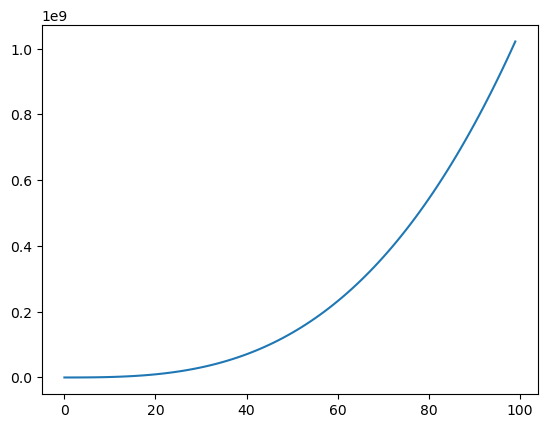

In [59]:
plt.plot(z)
plt.show()